## this notebook is to run an exploration of the impact of the different hyperparameters of the fit


In [1]:
# load the relevant modules for the analysis

import os
from pathlib import Path

from pl_temp_fit import Exp_data_utils, config_utils, fit_pl_utils

os.chdir("..")

In [2]:
exp_dataset_path = Path(
    "/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv"
)


In [3]:
# Read the experimental data available
csv_files = list(exp_dataset_path.glob("*.csv"))
string_to_find = "ITIC"
for id, csv_file in enumerate(csv_files):
    if string_to_find in str(csv_file):
        print(id, csv_file)

1 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500.csv
2 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-soln_mod_split0_split500.csv
3 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITICDIO-300K-9_G0_650.0nm_1450.0nm_12-07-2024-12h-49m_Exposure_2.0s_mod_split0_split500_mod_split0_split500.csv
12 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv
21 /media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITICDIO-300K-9_G0_650.0nm_1450.0nm_12-07-2024-12h-49m_Exposure_2.0s_mod_split0_split500.csv


/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500.csv


'/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500.csv'

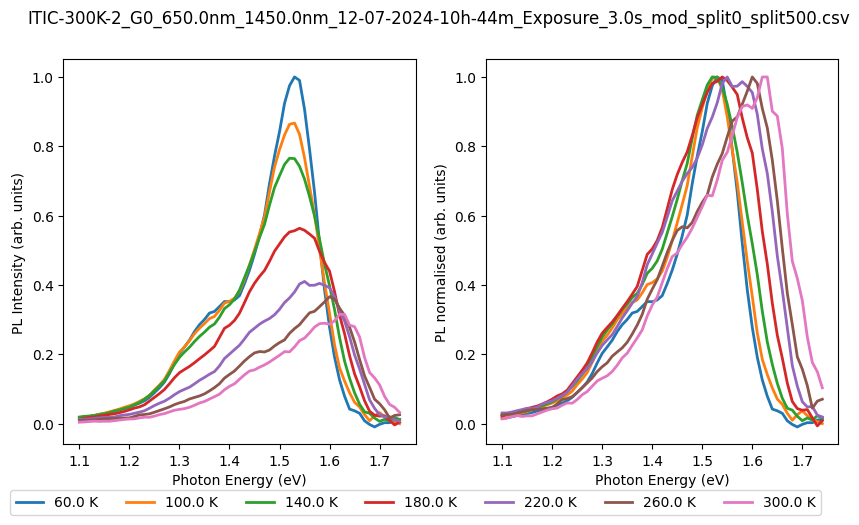

In [4]:
# choose the data to be analysed
# and plot them

csv_name = csv_files[1]
print(csv_name)
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
fig, ax = Exp_data_utils.plot_pl_data(
    Exp_data, temperature_list, hws, title=csv_name.name.split("/")[-1]
)
csv_name.absolute().as_posix()

[ 60. 100. 140. 180. 220. 260. 300.]
/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv
/media/mohammed/Work/pl_temp_fit/dat_hanbo_311024/csv/ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv


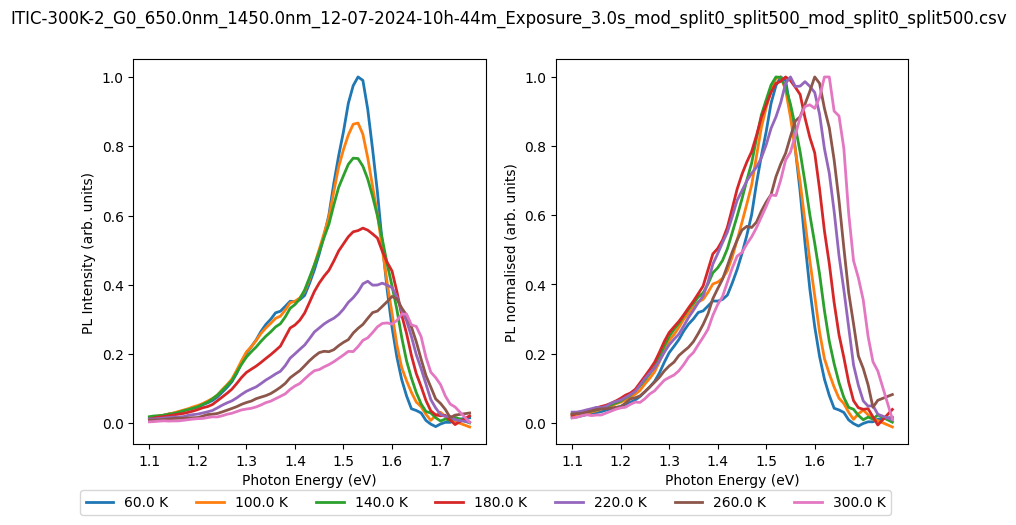

In [6]:
csv_names = Exp_data_utils.change_wavelength_range(
    csv_name,
    hws_limits=[1.1, 1.77],
    step=0.01,
    temperature_split=[],
)
for xsc_name in csv_names:
    Exp_data, temperature_list, hws = Exp_data_utils.read_data(xsc_name)
    fig, ax = Exp_data_utils.plot_pl_data(
        Exp_data, temperature_list, hws, title=xsc_name.name.split("/")[-1]
    )
    print(xsc_name)

In [7]:
# additional _exp data
max_abs_pos_exp = 1.77

temperature_lifetimes_exp = {
    "300": 3.2e-10,
    "260": 4.1e-10,
    "220": 5.1e-10,
    "180": 7.2e-10,
    "140": 8.9e-10,
    "100": 1.1e-09,
    "60": 1.1e-09,
}

# define the error in the data
(
    number_free_parameters,
    Temp_std_err,
    hws_std_err,
    relative_intensity_std_error_pl,
    noise_sigma,
) = (5, 10, 0.005, 0.1, 0.001)
error_in_max_abs_pos = 0.005
relative_error_lifetime = 0.01

# Define the model parameters

fixed_parameters_dict = {
    "EX": {
        "numbrstates": 20,
        "disorder_ext": 0.1,
    },
    "CT": {"off": 1},
    "D": {},
}
params_to_fit_init = {
    "EX": {"E": 1.7, "sigma": 0.04, "Li": 7.8e-2, "Lo": 0.11, "hO": 0.159},
    "CT": {},
    "D": {},
}
min_bounds = {
    "EX": {"E": 1.5, "sigma": 0.001, "Li": 0.03, "Lo": 0.03, "hO": 0.1},
    "CT": {},
    "D": {},
}
max_bounds = {
    "EX": {"E": 1.9, "sigma": 0.1, "Li": 0.2, "Lo": 0.2, "hO": 0.2},
    "CT": {},
    "D": {},
}
# set the paths for the database and the data
config_folder = "sensitivity_2"
database_folder = f"fit_experimental_emcee_pl/fit_data_base/{config_folder}/"
data_folder = f"fit_experimental_emcee_pl/fit_data/{config_folder}/"
path_database = Path(database_folder)
# set fitting parameters
num_iteration_max_likelihood = 5
coeff_spread = 0.5
nsteps = 10000
num_coords = 32

# save the model config
test_id_list = []

for _csv_name in csv_names:
    model_config, test_id = config_utils.save_model_config(
        csv_name_pl=_csv_name,
        Temp_std_err=Temp_std_err,
        hws_std_err=hws_std_err,
        relative_intensity_std_error_pl=relative_intensity_std_error_pl,
        temperature_list_pl=temperature_list,
        hws_pl=hws,
        noise_sigma=noise_sigma,
        fixed_parameters_dict=fixed_parameters_dict,
        params_to_fit_init=params_to_fit_init,
        min_bounds=min_bounds,
        max_bounds=max_bounds,
        num_iteration_max_likelihood=num_iteration_max_likelihood,
        coeff_spread=coeff_spread,
        nsteps=nsteps,
        num_coords=num_coords,
        database_folder=database_folder,
        data_folder=data_folder,
        temperature_lifetimes_exp=temperature_lifetimes_exp,
        max_abs_pos_exp=max_abs_pos_exp,
        error_in_max_abs_pos=error_in_max_abs_pos,
        relative_error_lifetime=relative_error_lifetime,
    )
    test_id_list.append(test_id)

from pl_temp_fit import HPC_utils

script_to_run = "new_pl_sampling_alllifetimes_abs"
new_path = "dat_hanbo_311024/csv/"
new_path_save_folder = f"fit_experimental_emcee_pl/fit_data/{config_folder}"

for test_id in test_id_list:
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder=path_database
    )
    csv_name = model_config_save["csv_name_pl"]
    print(model_config_save["csv_name_pl"].split("/")[-1])
    model_config_save = config_utils.update_csv_name_pl(
        model_config_save,
        csv_name,
        new_path,
        new_path_save_folder,
        script_to_run,
        test_id,
    )
    config_utils.updata_model_config(test_id, path_database, model_config_save)
    HPC_utils.save_slurm_script(
        test_id,
        script_to_run,
        model_config_save,
        config_folder,
        sh_name=test_id + ".sh",
    )

size of hw is (67,)
size of temperature_list is (7,)
ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv
225e5b67-23f6-4435-9478-029693d41c3a.sh


shape of mean value plot is (67, 7)


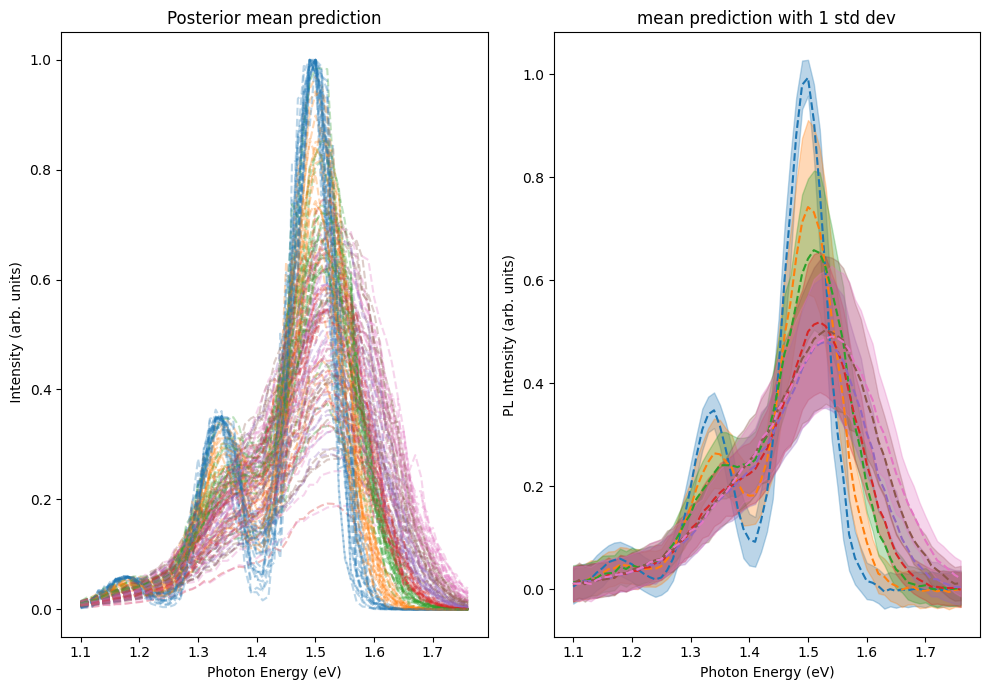

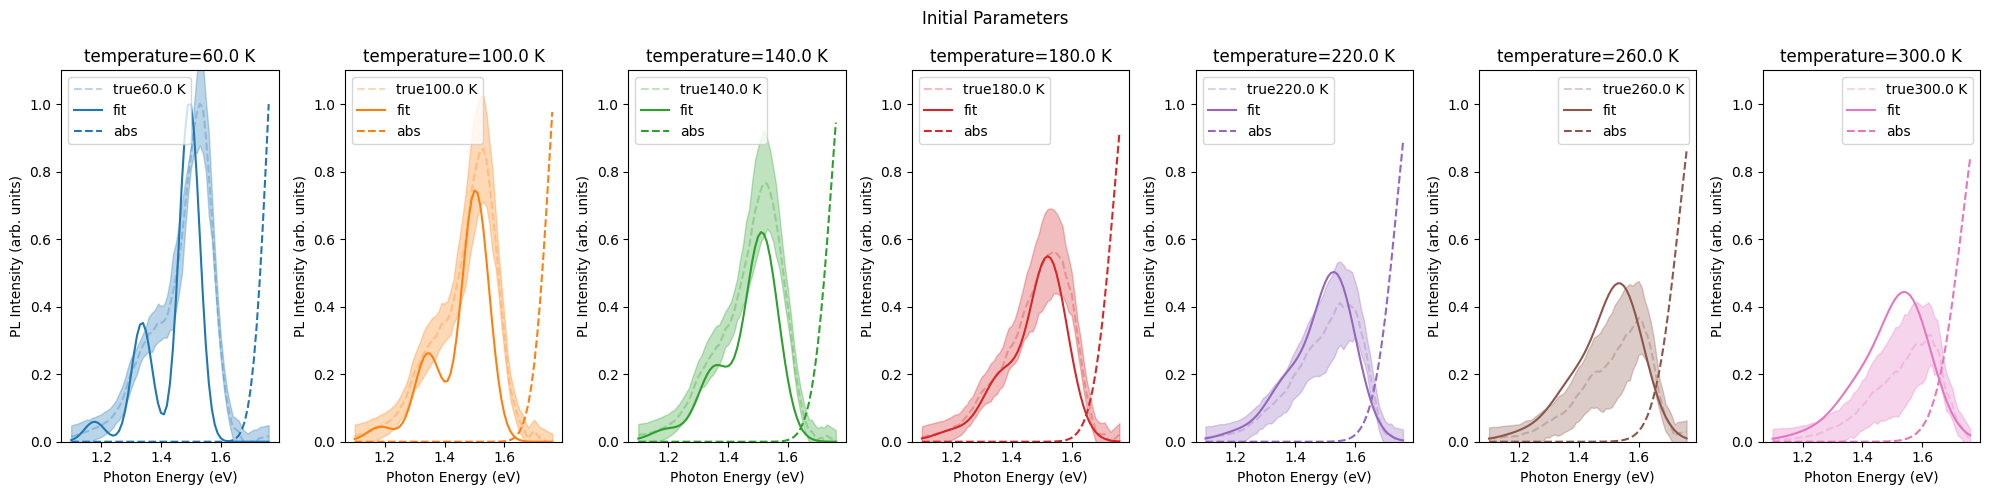

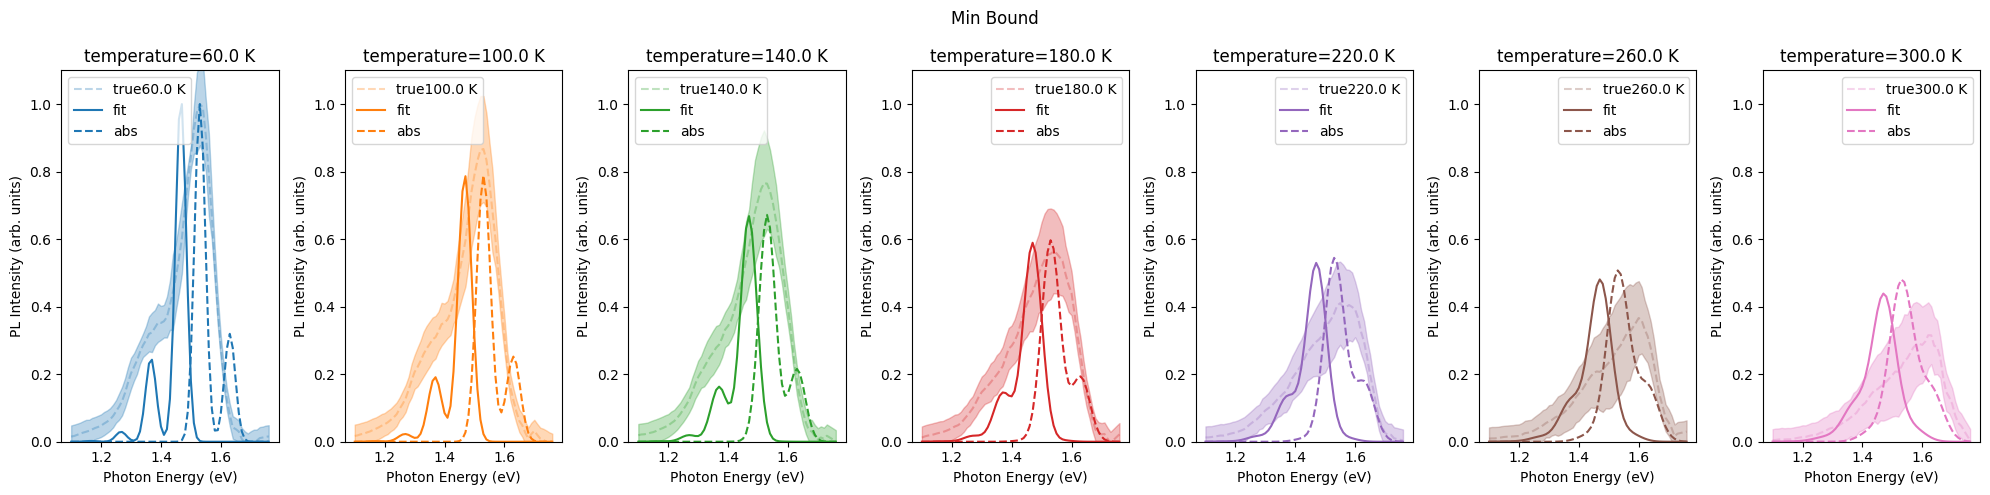

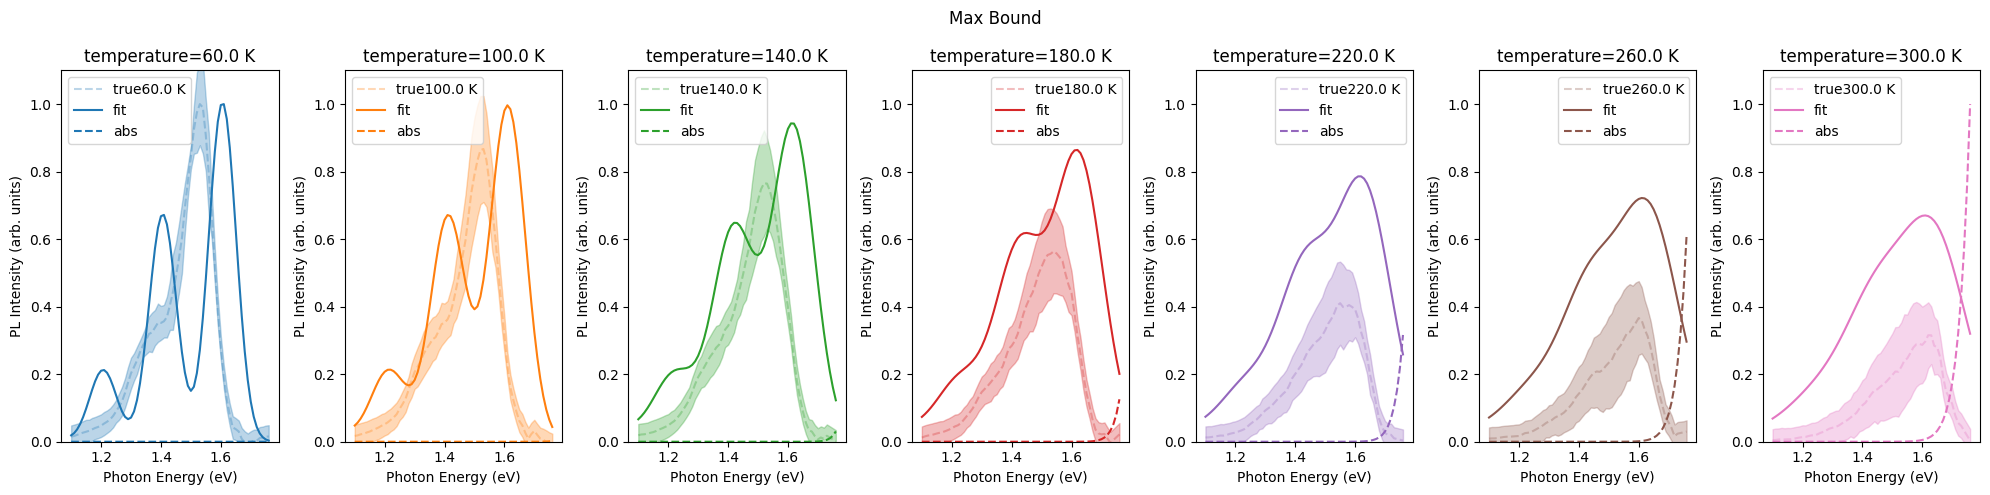

In [8]:
model_config, model_config_save = config_utils.load_model_config(
    test_id, database_folder=path_database
)
fit_pl_utils.plot_fit_limits(model_config, model_config_save)


In [13]:
import matplotlib.pyplot as plt
import numpy as np


def plot_fit_statistics(
    reader,
    range_chi_square=(0, 3),
    range_log_prior=(-1000, 0),
    discard=5,
    filter_log_likelihood="",
):
    """Plot the fit statistics from the sampling output.

    reader: the reader object from the emcee sampler
    range_chi_square: the range for the chi square plot
    range_log_prior: the range for the log prior plot
    discard: the number of samples to discard
    filter_log_likelihood: whether to filter the log likelihood
    """
    print("number of iterations", reader.iteration)
    blobs = reader.get_blobs(flat=True, discard=discard)
    distribution = reader.get_chain(discard=discard, flat=True)
    log_likelihood = reader.get_log_prob(discard=discard, flat=True)
    distribution = eval(f" distribution[{filter_log_likelihood}]")
    log_likelihood = eval(f" log_likelihood[{filter_log_likelihood}]")
    print("shape of likelihood", log_likelihood.shape)

    fig, ax = plt.subplots(2, 3, figsize=(10, 7))
    ax = ax.flatten()
    ax[0].hist(
        log_likelihood[0],
        30,
        color="C" + str(0),
        linewidth=2,
        histtype="step",
        range=range_log_prior,
    )
    ax[0].set_xlabel("log likelihood")
    ax[0].set_ylabel("Number of samples")
    ax[0].set_title("log likelihood distribution")
    for i, blob in enumerate(blobs.dtype.names):
        if i > 4:
            break
        ax[i + 1].scatter(
            np.arange(len(blobs[blob])),
            blobs[blob],
            color="C" + str(i + 1),
            s=1,
            # range=range_chi_square,
        )
        ax[i + 1].set_xlabel(blob)
        ax[i + 1].set_ylabel("Number of samples")
        ax[i + 1].set_title(f"{blob}")

    fig.tight_layout()
    for axi in ax:
        axi.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    fig.tight_layout()
    plt.show()

Temp_std_err 5
error_in_max_abs_pos 0.005
number of iterations 10000
shape of likelihood (1, 304000)


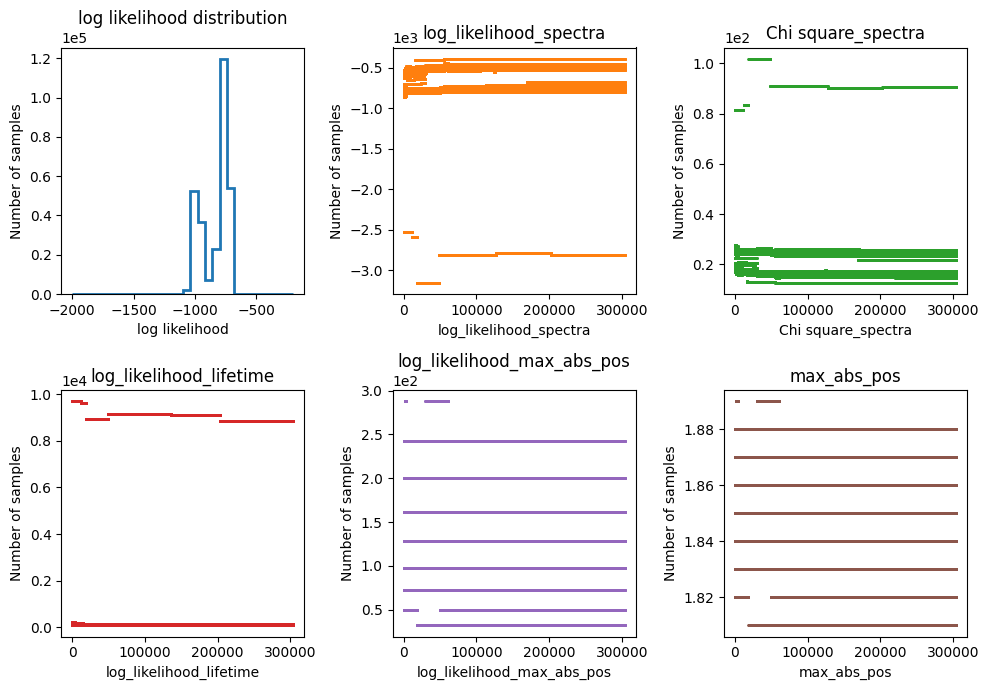

Temp_std_err 10
error_in_max_abs_pos 0.005
number of iterations 10000
shape of likelihood (1, 304000)


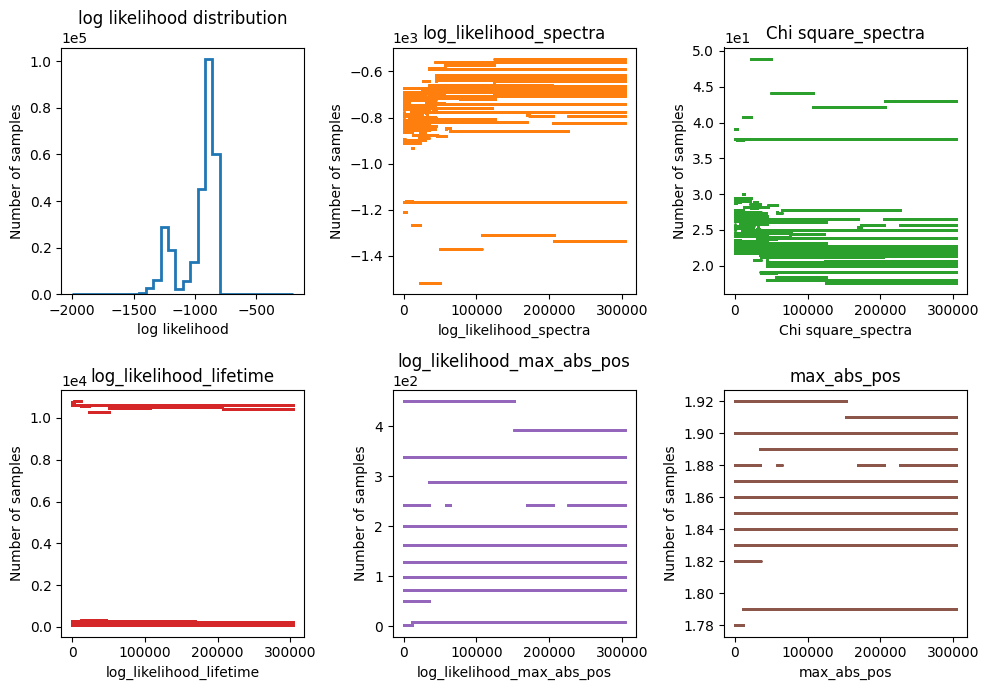

Temp_std_err 10
error_in_max_abs_pos 0.01
number of iterations 8217
shape of likelihood (1, 246944)


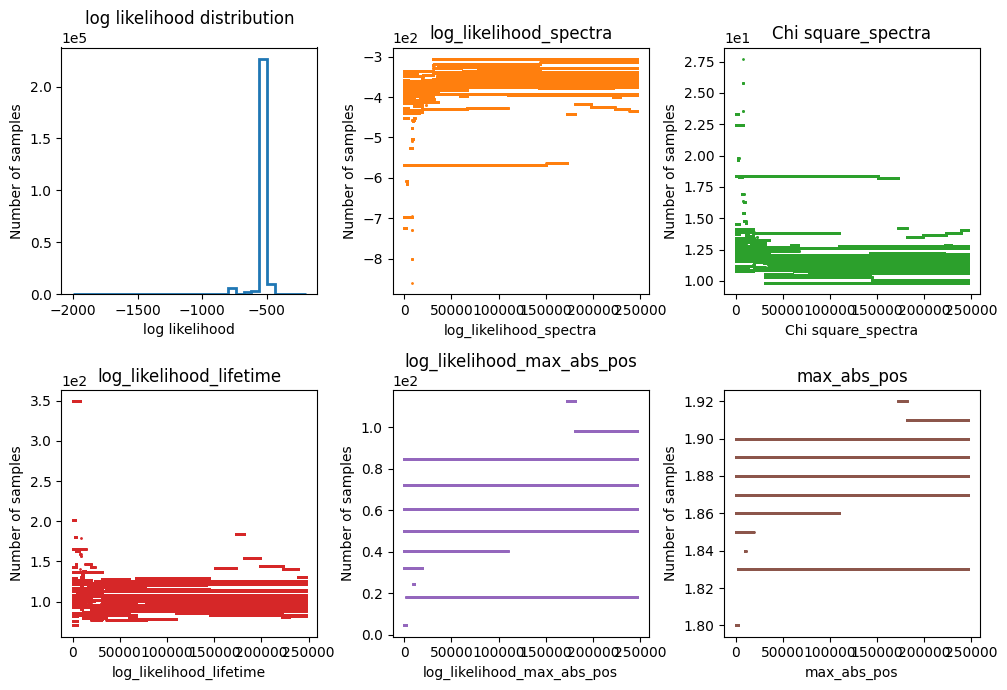

In [16]:
# analyse the data
import emcee

test_id_list = [
    "fb94ae38-cefe-44c1-b233-e488428c6f80",
    # "f1fbd365-fb8b-451c-961e-f2a8b58c68dd",
    "ae6987e0-42ec-4d82-a732-a0726c3348fd",
    "75c634bf-52c7-4425-9d14-f8af1866b174",
]
reader_list = []
err_stats = []
for test_id in test_id_list:
    add_for_ssh = "/run/user/1000/gvfs/sftp:host=lcmdlc3.epfl.ch,user=mazzouzi/home/mazzouzi/pl_temp_fit/"
    database_folder = add_for_ssh  / path_database
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder=database_folder
    )
    #add_for_ssh = "/run/user/1000/gvfs/sftp:host=lcmdlc3.epfl.ch,user=mazzouzi/home/mazzouzi/pl_temp_fit/"
    filename = add_for_ssh + model_config_save["save_folder"] + "/sampler.h5"
    reader = emcee.backends.HDFBackend(filename, name="multi_core")
    distribution = reader.get_chain(discard=0, flat=True)
    import importlib

    from pl_temp_fit import plot_utils

    importlib.reload(plot_utils)
    # print the error properties
    error_stat = ""
    for key in [
        "Temp_std_err",
        "error_in_max_abs_pos",
    ]:  # , "relative_error_lifetime"]:
        if "err" in key:
            print(key, model_config_save[key])
            error_stat = error_stat + f"{key}: {model_config_save[key]}, "
    plot_fit_statistics(
        reader,
        range_log_prior=(-2000, -200),
        discard=500,
        range_chi_square=(0, 10),
        filter_log_likelihood=True,
    )
    reader_list.append(reader)
    err_stats.append(error_stat)


In [17]:
def get_distributions(readers, model_config_save, discard=50):
    """plot the chains from the sampling output
    reader: the reader object from the emcee sampler
    model_config_save: the model config save dictionary
    discard: the number of samples to discard
    """
    csv_name = model_config_save["csv_name_pl"]
    label_list = []
    for key in model_config_save["params_to_fit_init"].keys():
        label_list.extend(
            [
                key + "_" + x
                for x in model_config_save["params_to_fit_init"][key].keys()
            ]
        )
    params_to_fit = model_config_save["params_to_fit_init"]
    labels = []
    min_bound = {}
    max_bound = {}
    for key in params_to_fit.keys():
        for keys in params_to_fit[key].keys():
            labels.append(f"{key}_{keys}")
            min_bound[f"{key}_{keys}"] = model_config_save["min_bounds"][key][
                keys
            ]
            max_bound[f"{key}_{keys}"] = model_config_save["max_bounds"][key][
                keys
            ]
    labels = label_list
    distrbutions = {}
    for reader in readers:
        distribution = reader.get_chain(discard=discard, flat=True)
        for i, label in enumerate(labels):
            if label in distrbutions:
                distrbutions[label].append(distribution[:, i])
            else:
                distrbutions[label] = [distribution[:, i]]
    return distrbutions, min_bound, max_bound


distributions_dict, min_bound, max_bound = get_distributions(
    reader_list, model_config_save
)

/tmp/ipykernel_38466/3125951611.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[-1].legend(loc="best", fontsize=10)
/tmp/ipykernel_38466/3125951611.py:62: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


(<Figure size 1000x700 with 5 Axes>,
 array([<Axes: ylabel='EX_E'>, <Axes: ylabel='EX_sigma'>,
        <Axes: ylabel='EX_Li'>, <Axes: ylabel='EX_Lo'>,
        <Axes: xlabel='step number', ylabel='EX_hO'>], dtype=object))

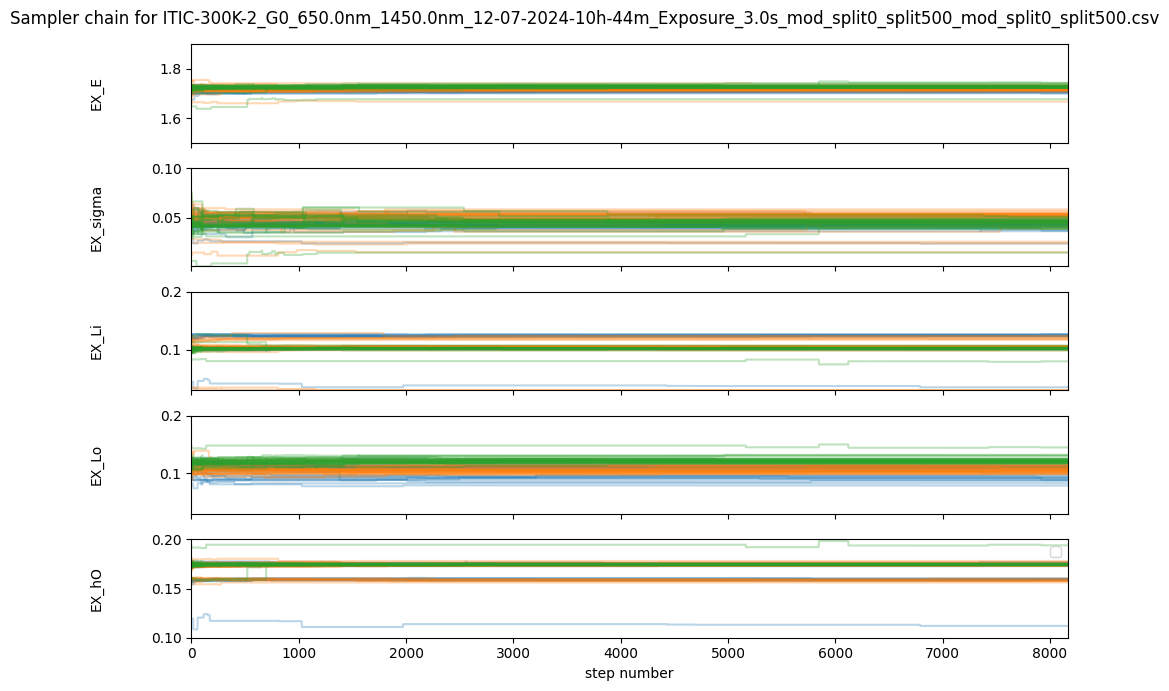

In [18]:
def plot_chains(readers, model_config_save, discard=50):
    """plot the chains from the sampling output
    reader: the reader object from the emcee sampler
    model_config_save: the model config save dictionary
    discard: the number of samples to discard
    """
    csv_name = model_config_save["csv_name_pl"]
    label_list = []
    for key in model_config_save["params_to_fit_init"].keys():
        label_list.extend(
            [
                key + "_" + x
                for x in model_config_save["params_to_fit_init"][key].keys()
            ]
        )
    params_to_fit = model_config_save["params_to_fit_init"]
    labels = []
    min_bound = {}
    max_bound = {}
    for key in params_to_fit.keys():
        for keys in params_to_fit[key].keys():
            labels.append(f"{key}_{keys}")
            min_bound[f"{key}_{keys}"] = model_config_save["min_bounds"][key][
                keys
            ]
            max_bound[f"{key}_{keys}"] = model_config_save["max_bounds"][key][
                keys
            ]

    labels = label_list
    fig, axes = None, None

    for jj, reader in enumerate(readers):
        samples = reader.get_chain(discard=discard)
        ndim = len(labels)
        if fig is None:
            fig, axes = plt.subplots(ndim, 1, figsize=(10, 7), sharex=True)

        for i in range(ndim):
            ax = axes[i]
            if i == 0:
                ax.plot(
                    samples[:, :, i],
                    alpha=0.30,
                    color="C" + str(jj),
                    label=err_stats[jj],
                )
            else:
                ax.plot(samples[:, :, i], alpha=0.30, color="C" + str(jj))
            ax.set_xlim(0, len(samples))
            ax.set_ylabel(labels[i])
            ax.yaxis.set_label_coords(-0.1, 0.5)
            if (
                min_bound[labels[i]] is not None
                and max_bound[labels[i]] is not None
            ):
                ax.set_ylim(min_bound[labels[i]], max_bound[labels[i]])
        axes[-1].legend(loc="best", fontsize=10)
        axes[-1].set_xlabel("step number")
    fig.suptitle(f"Sampler chain for {csv_name.split('/')[-1]}")
    fig.tight_layout()
    fig.show()
    return fig, axes


plot_chains(reader_list, model_config_save, discard=50)

In [19]:
def get_blobs_distribution(reader_list, discard=50):
    """Get the blobs distribution from the reader list"""
    blobs_dict = {}
    for reader in reader_list:
        blobs = reader.get_blobs(flat=True, discard=discard)
        for key in blobs.dtype.names:
            if key in blobs_dict:
                blobs_dict[key].append(blobs[key])
            else:
                blobs_dict[key] = [blobs[key]]
    return blobs_dict
blobs_dict = get_blobs_distribution(reader_list, discard=2000)

In [20]:
Temp_list = ["300.0", "260.0", "220.0", "180.0", "140.0", "100.0", "60.0"]
lifetimes = []
for temp in Temp_list:
    lifetime = [1/(x+y) for x,y in zip(blobs_dict[f"Ex_knr_{temp}K"],blobs_dict[f"Ex_kr_{temp}K"])]
    blobs_dict[f"Lifetime_{temp}"] = lifetime

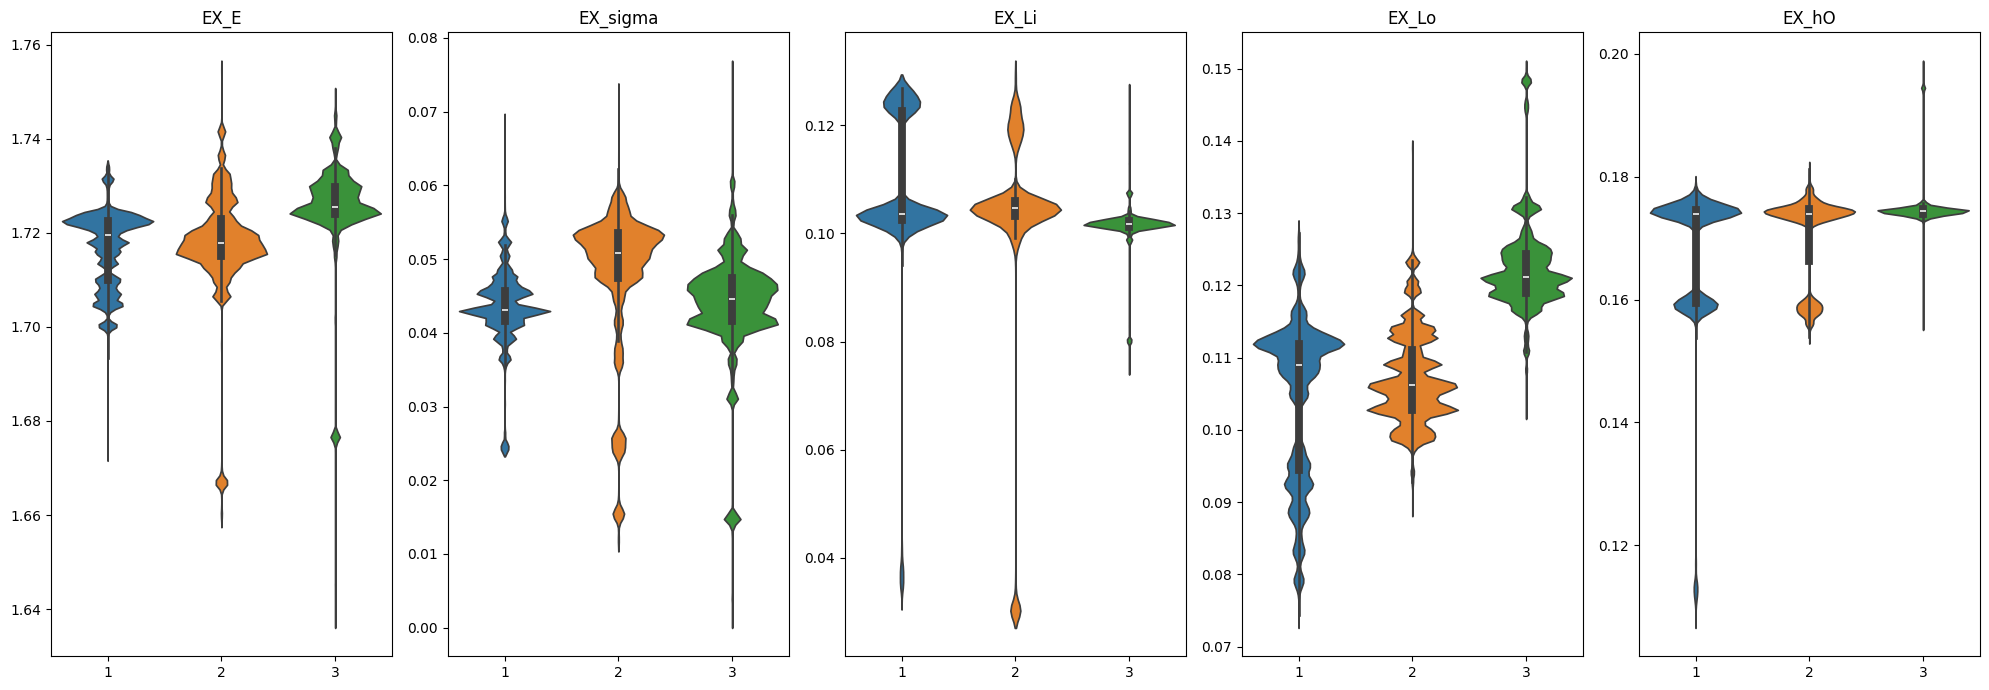

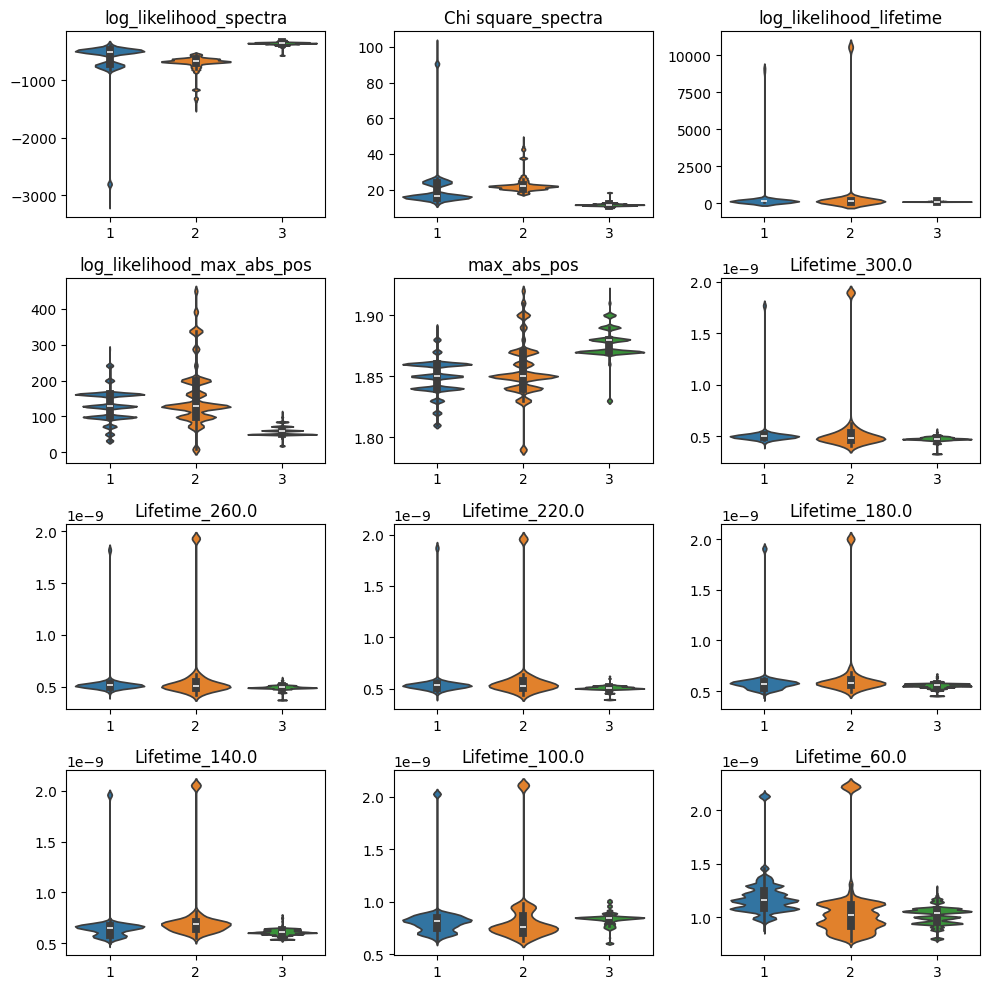

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def plot_violin(
    distributions, labels, title="Violin Plot of Distributions", ax=None
):
    """
    Plot a violin plot of different distributions.

    Parameters:
    distributions (list of array-like): List of distributions to plot.
    labels (list of str): List of labels for each distribution.
    title (str): Title of the plot.
    """
    # Create a figure and axis

    # Create a violin plot
    sns.violinplot(data=distributions, ax=ax)

    # Set the labels and title
    ax.set_xticks(ticks=np.arange(len(labels)), labels=labels)
    ax.set_title(title)


labels = ["1", "2", "3"]
fig, ax = plt.subplots(1, 5, figsize=(20, 7), sharex=True)
ax = ax.flatten()
count = 0
for label, distributions_list in distributions_dict.items():
    axs = ax[count]
    plot_violin(distributions_list, labels, title=label, ax=axs)
    count += 1
fig.tight_layout()
count = 0
fig,ax = plt.subplots(4,3,figsize=(10,10))
ax = ax.flatten()
for label,dist in blobs_dict.items():
    if "Ex" in label:
        continue    
    axs = ax[count]
    plot_violin(dist,labels,title=label,ax=axs)
    count += 1
fig.tight_layout()

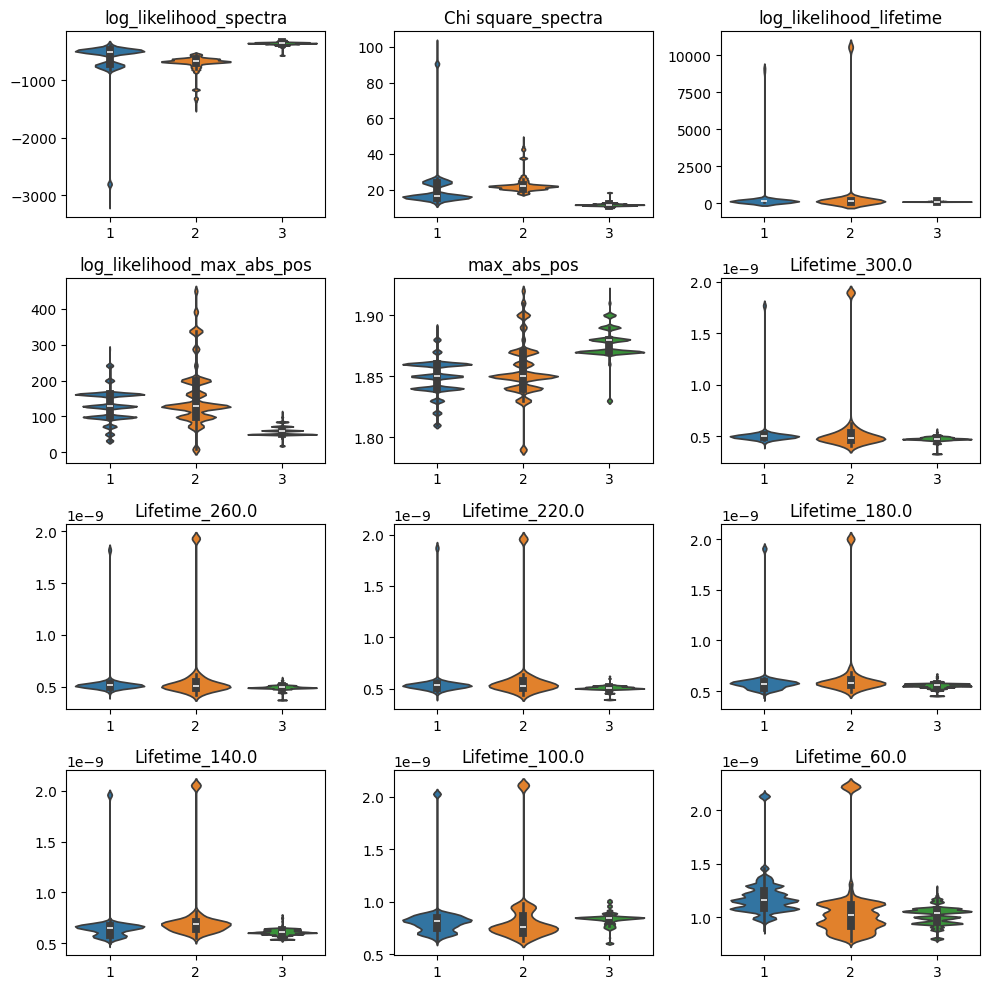

In [23]:
fig,ax = plt.subplots(4,3,figsize=(10,10))
ax = ax.flatten()
count = 0
for label,dist in blobs_dict.items():
    if "Ex" in label:
        continue    
    axs = ax[count]
    plot_violin(dist,labels,title=label,ax=axs)
    count += 1
fig.tight_layout()

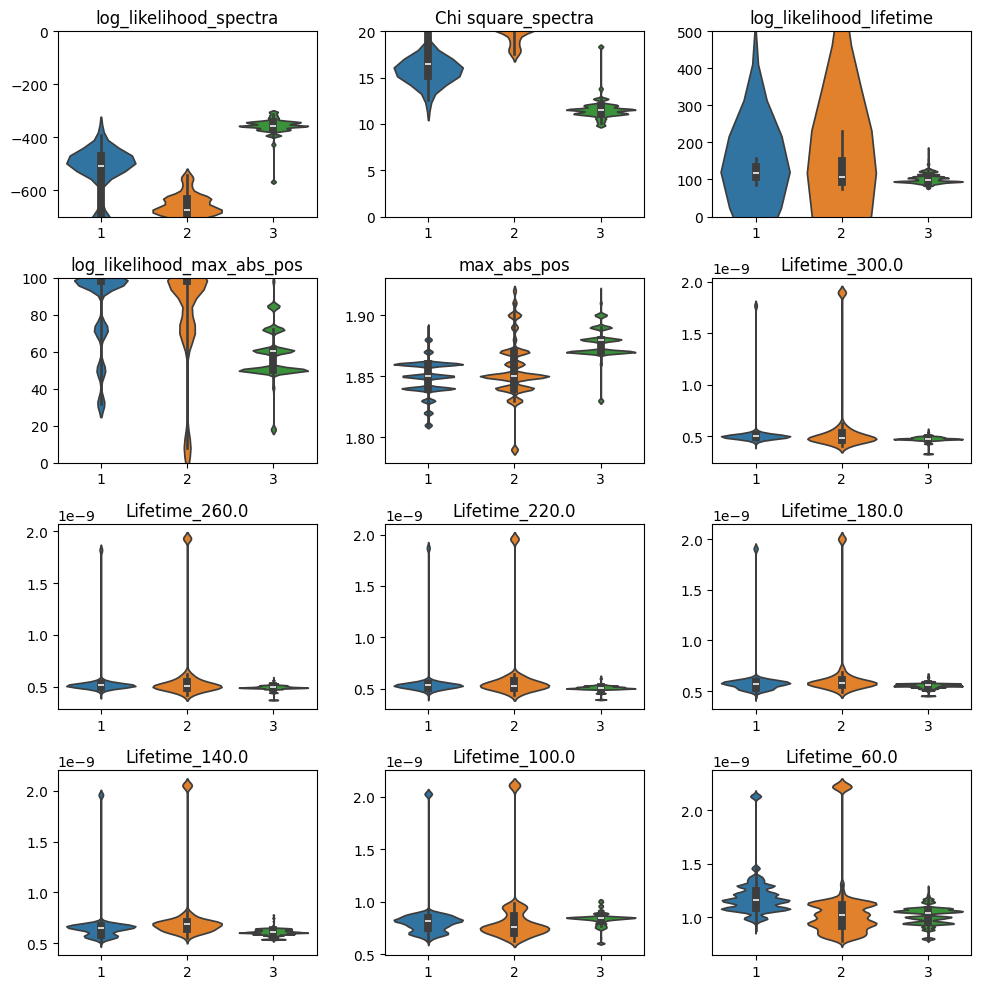

In [36]:
axs = fig.get_axes()
axs[0].set_ylim(-700,0)
axs[1].set_ylim(0,20)
axs[2].set_ylim(0,500)
axs[3].set_ylim(0,100)
fig

In [72]:
filter_log_likelihood = "blobs['log_likelihood_spectra'] > max(blobs['log_likelihood_spectra']) * 2"
plot_utils.plot_fit_to_experimental_data(
    model_config_save,
    model_config,
    reader_list[-1],
    discard=0,
    filter_log_likelihood=filter_log_likelihood,
)

FileNotFoundError: dat_hanbo_311024/csv//ITIC-300K-2_G0_650.0nm_1450.0nm_12-07-2024-10h-44m_Exposure_3.0s_mod_split0_split500_mod_split0_split500.csv not found.

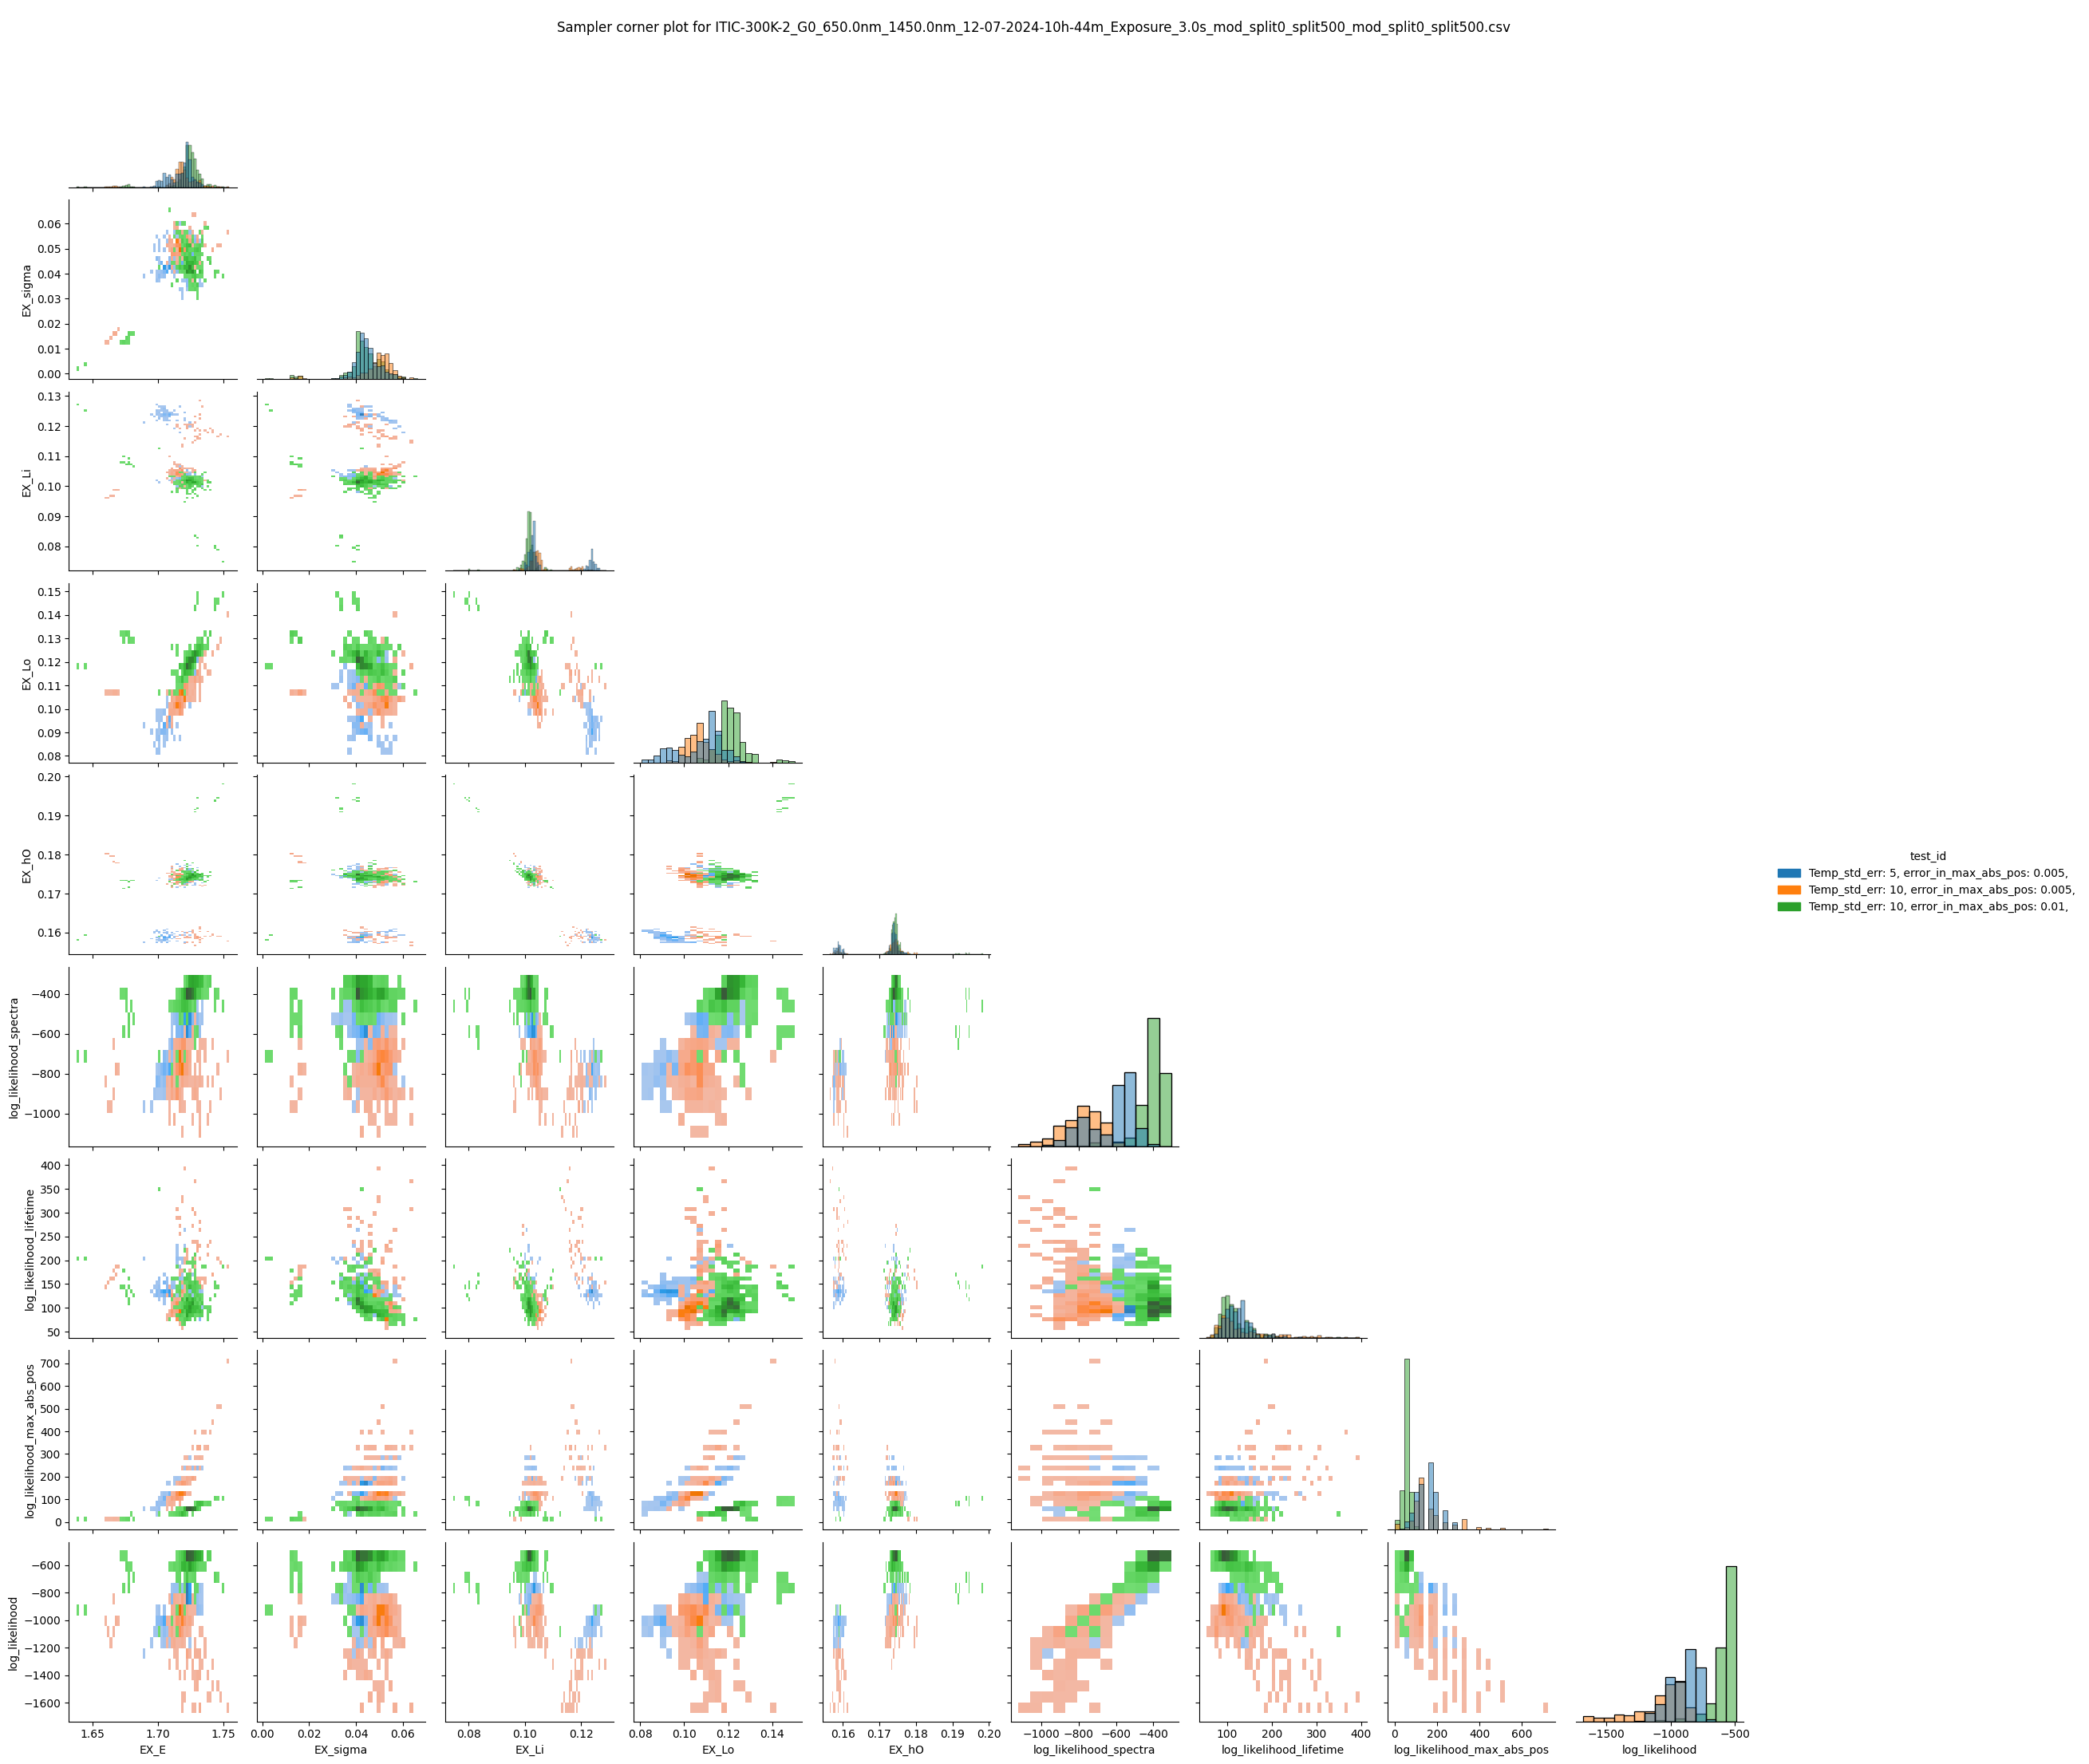

In [34]:
import pandas as pd
import seaborn as sns


def plot_corner(
    readers,
    model_config_save,
    discard=10,
    filter_log_likelihood=False,
    err_stats=None,
):
    """plot the corner plot from the sampling output
    reader: the reader object from the emcee sampler
    model_config_save: the model config save dictionary
    discard: the number of samples to discard
    """

    def create_df_samples(reader):
        samples = reader.get_chain(discard=discard, flat=True)
        blobs = reader.get_blobs(flat=True, discard=discard)[: len(samples)]
        log_likelihood = reader.get_log_prob(discard=discard, flat=True)[
            : len(samples)
        ]
        samples = eval(f" samples[{filter_log_likelihood}]")
        log_likelihood = eval(f" log_likelihood[{filter_log_likelihood}]")
        blobs = eval(f" blobs[{filter_log_likelihood}]")
        samples = samples.reshape(-1, len(labels))
        df_samples = pd.DataFrame(samples, columns=labels)
        df_samples["log_likelihood_spectra"] = blobs["log_likelihood_spectra"]
        df_samples["log_likelihood_lifetime"] = blobs[
            "log_likelihood_lifetime"
        ]
        df_samples["log_likelihood_max_abs_pos"] = blobs[
            "log_likelihood_max_abs_pos"
        ]
        df_samples["log_likelihood_spectra"] = log_likelihood
        return df_samples

    csv_name = model_config_save["csv_name_pl"]
    label_list = []

    for key in model_config_save["params_to_fit_init"].keys():
        label_list.extend(
            [
                key + "_" + x
                for x in model_config_save["params_to_fit_init"][key].keys()
            ]
        )
    labels = label_list
    df_samples_merged = pd.DataFrame()
    for iid, reader in enumerate(readers):
        df_samples = create_df_samples(reader)
        # add categorical variables and merge the dataframes
        df_samples["test_id"] = err_stats[iid]
        df_samples.drop_duplicates(inplace=True)
        df_samples_merged = pd.concat([df_samples_merged, df_samples])

    g = sns.pairplot(
        df_samples_merged, kind="hist", corner=True, hue="test_id"
    )
    g.fig.suptitle(f"Sampler corner plot for {csv_name.split('/')[-1]}")
    return g


filter_log_likelihood = "blobs['log_likelihood_lifetime'] < min(blobs['log_likelihood_lifetime']) * 30"
g = plot_corner(
    reader_list,
    model_config_save,
    discard=100,
    filter_log_likelihood=filter_log_likelihood,
    err_stats=err_stats,
)

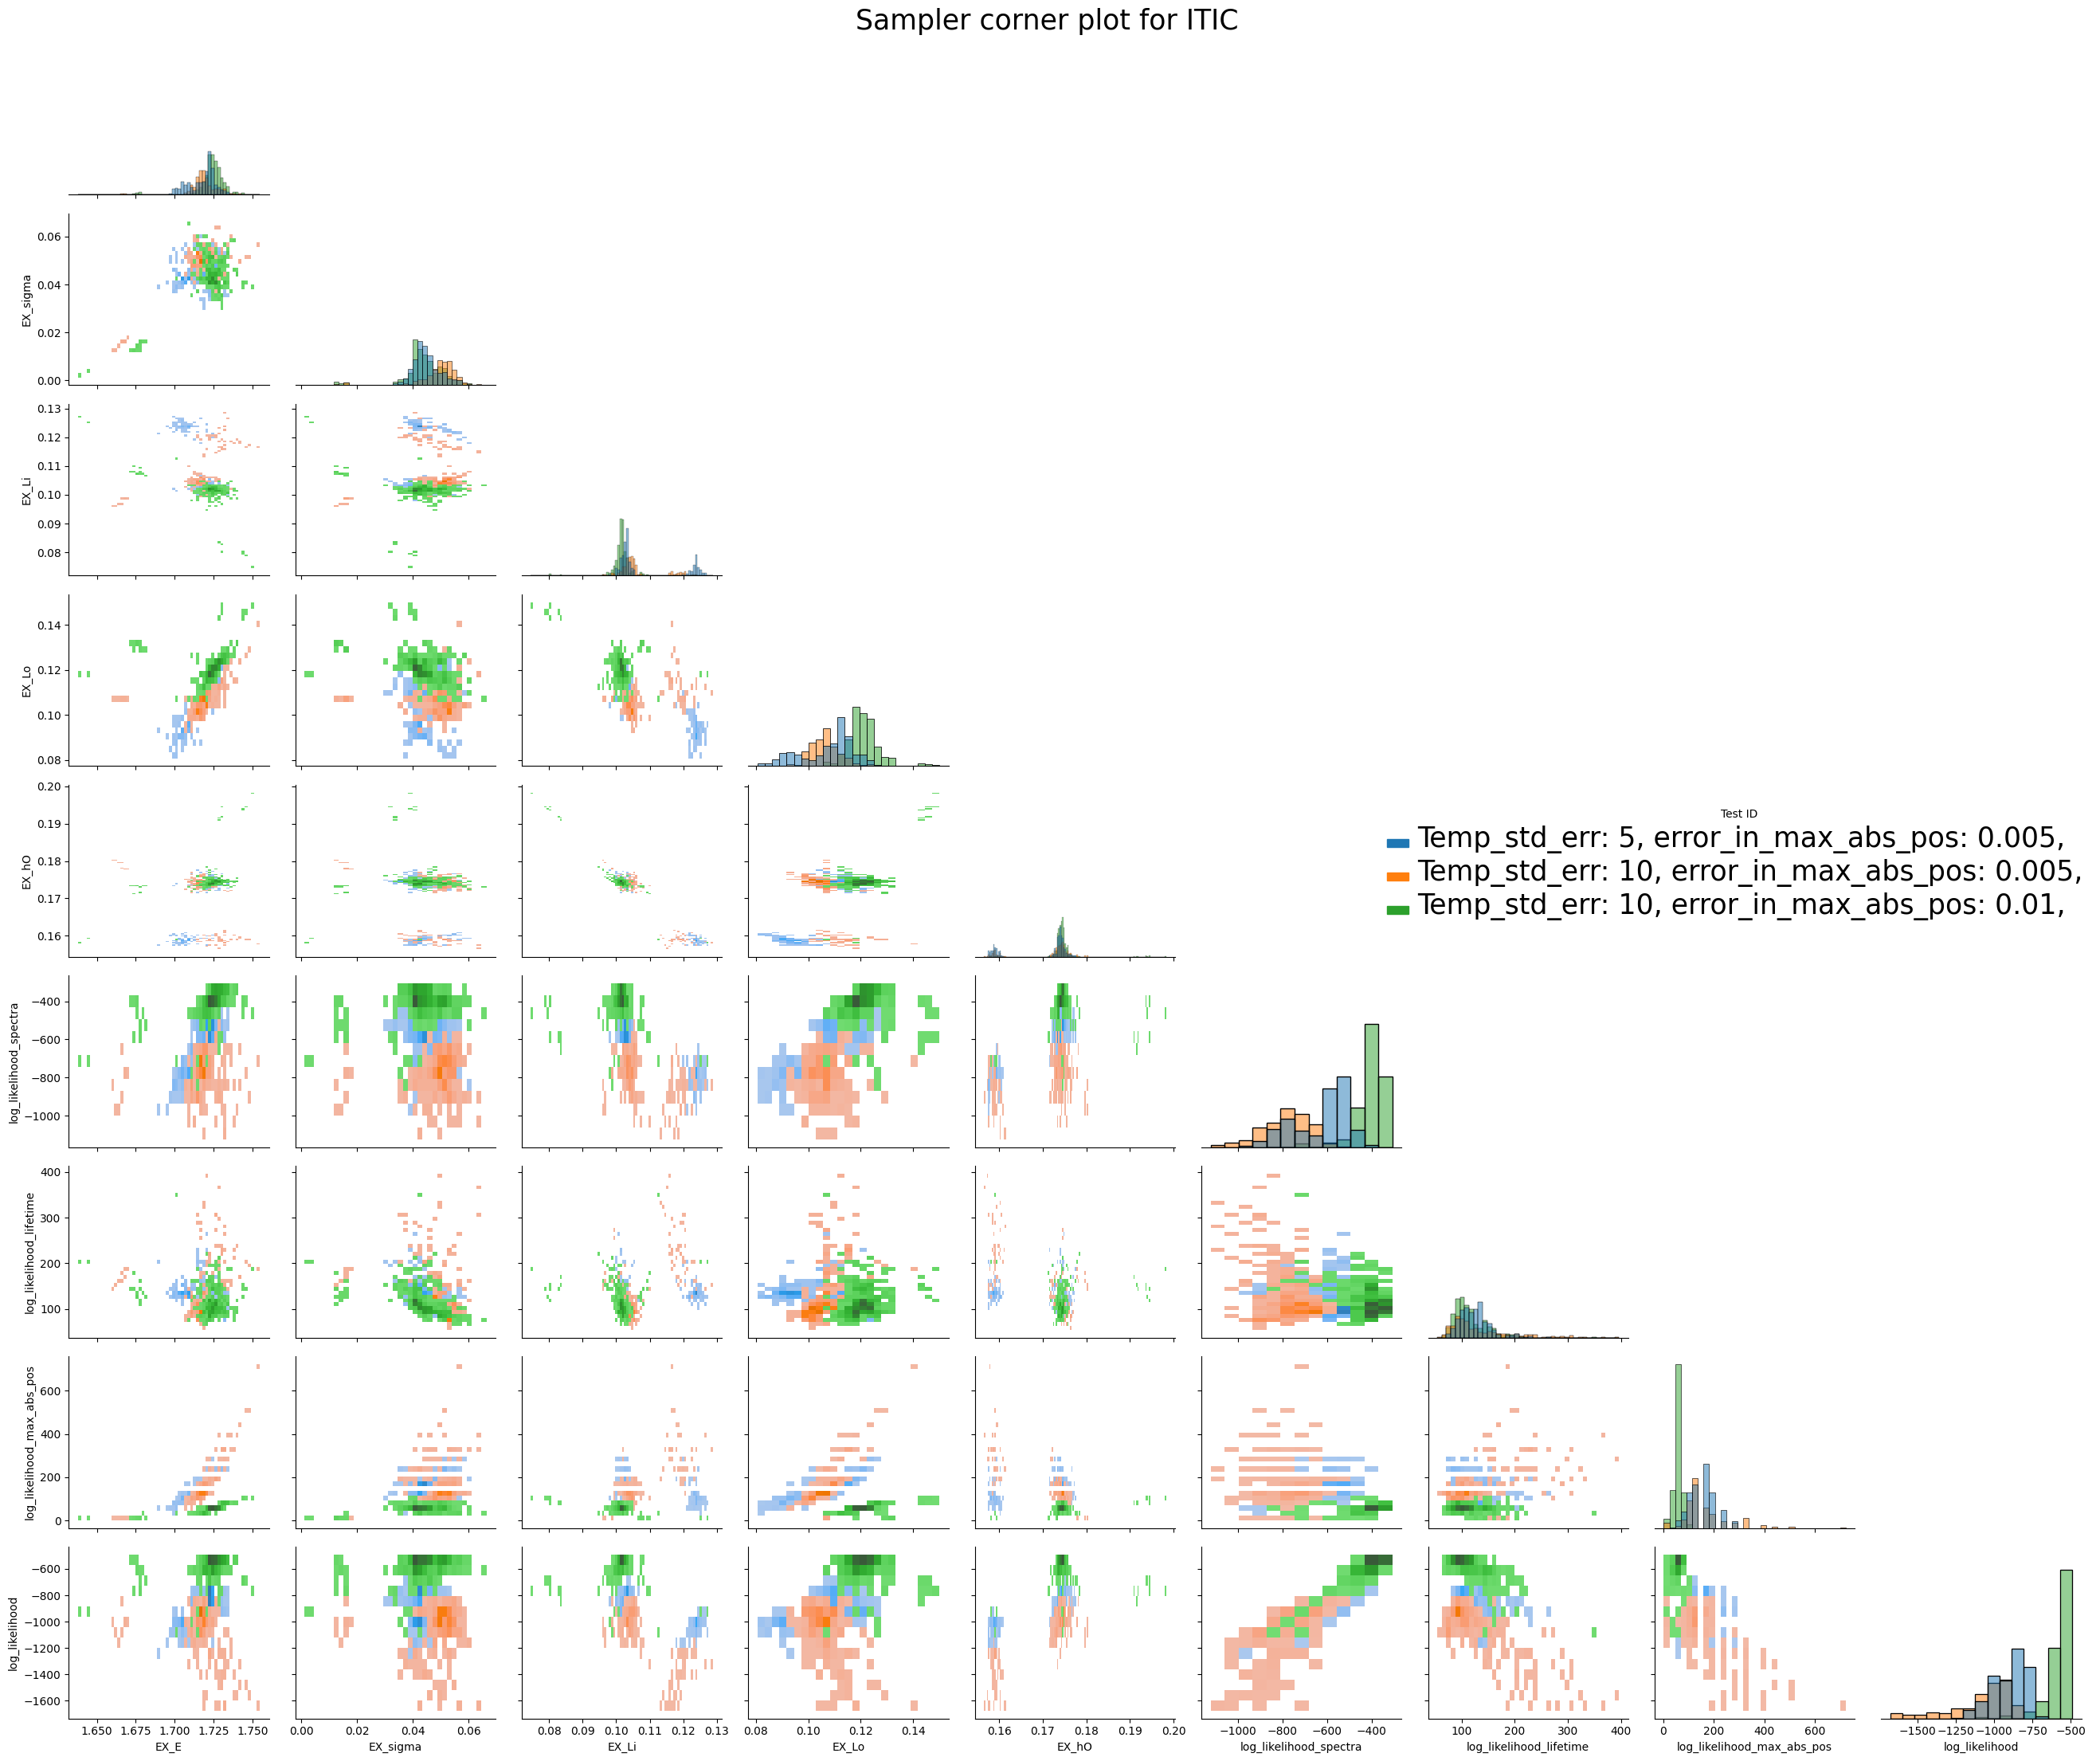

In [49]:
g._legend.set_bbox_to_anchor((1, 0.5))  # Example: move legend to the right center
g._legend.set_title("Test ID")  # Optionally set the legend title
# increase the fontsize of the legend
for t in g._legend.texts:
    t.set_fontsize(25)
g.fig.suptitle("Sampler corner plot for ITIC", fontsize=25)
g.fig.tight_layout()

display(g.fig)  

In [37]:
g._legend.set_bbox_to_anchor((1, 0.5))  # Example: move legend to the right center
g._legend.set_title("Test ID")  # Optionally set the legend title
g.fig.tight_layout()
g.fig.show()

(<Figure size 1250x1250 with 20 Axes>,
 array([[<Axes: ylabel='EX_E'>, None, None, None, None],
        [<Axes: xlabel='EX_E', ylabel='EX_sigma'>, <Axes: >, None, None,
         None],
        [<Axes: xlabel='EX_E', ylabel='EX_Li'>,
         <Axes: xlabel='EX_sigma', ylabel='EX_Li'>, <Axes: >, None, None],
        [<Axes: xlabel='EX_E', ylabel='EX_Lo'>,
         <Axes: xlabel='EX_sigma', ylabel='EX_Lo'>,
         <Axes: xlabel='EX_Li', ylabel='EX_Lo'>, <Axes: >, None],
        [<Axes: xlabel='EX_E', ylabel='EX_hO'>,
         <Axes: xlabel='EX_sigma', ylabel='EX_hO'>,
         <Axes: xlabel='EX_Li', ylabel='EX_hO'>,
         <Axes: xlabel='EX_Lo', ylabel='EX_hO'>, <Axes: xlabel='EX_hO'>]],
       dtype=object))

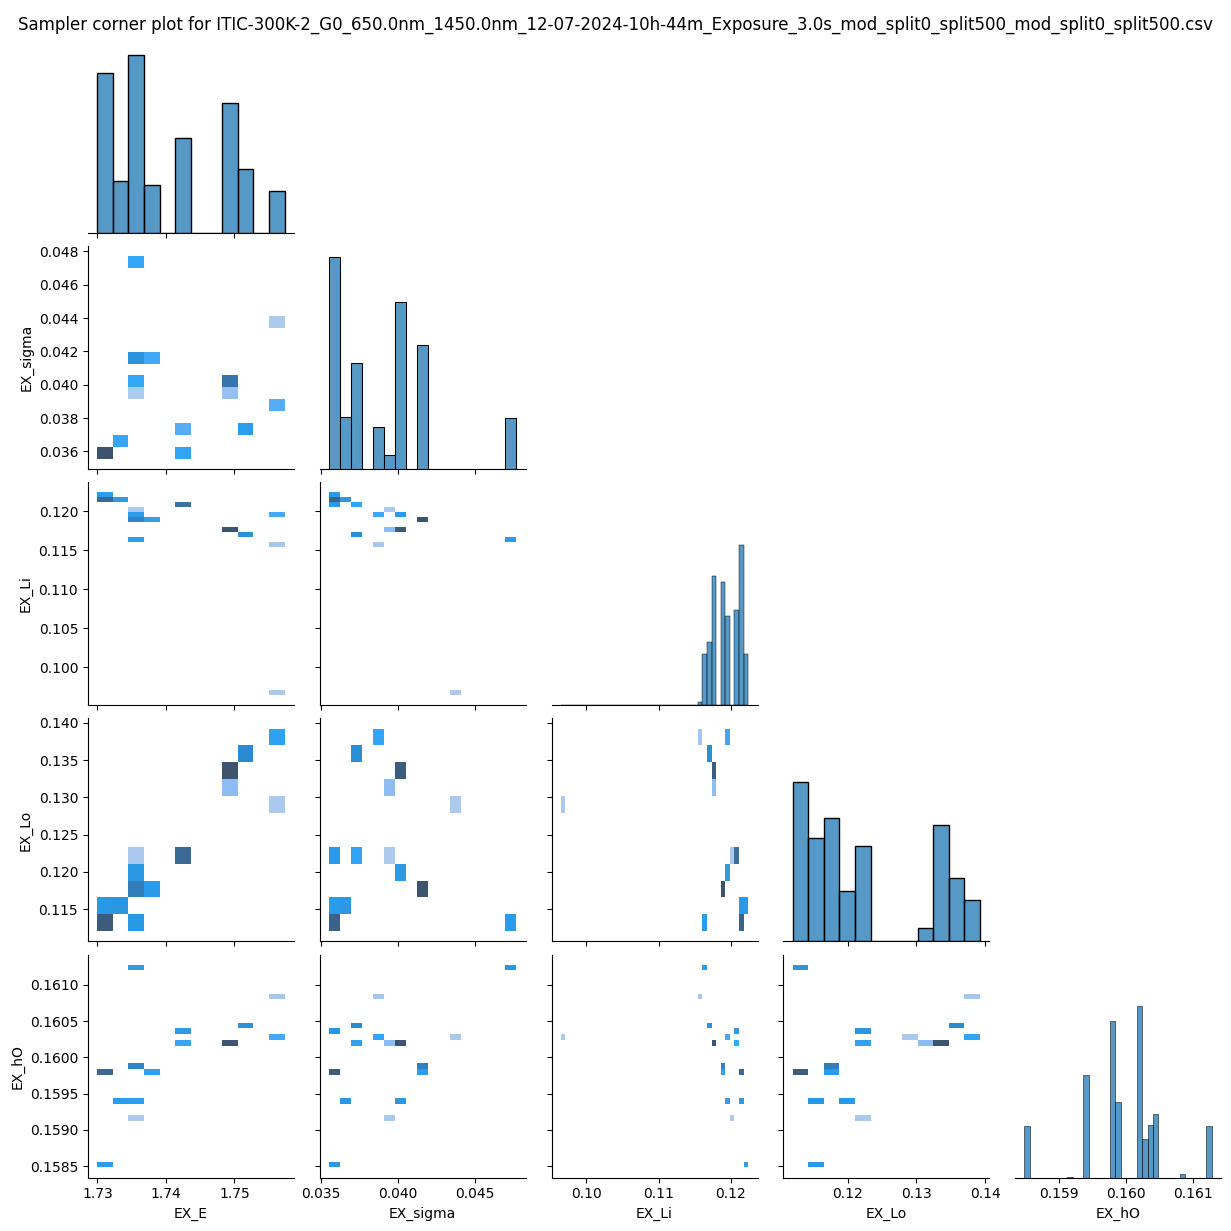

In [ ]:
plot_utils.plot_corner(
    reader,
    model_config_save,
    discard=0,
    filter_log_likelihood=filter_log_likelihood,
)

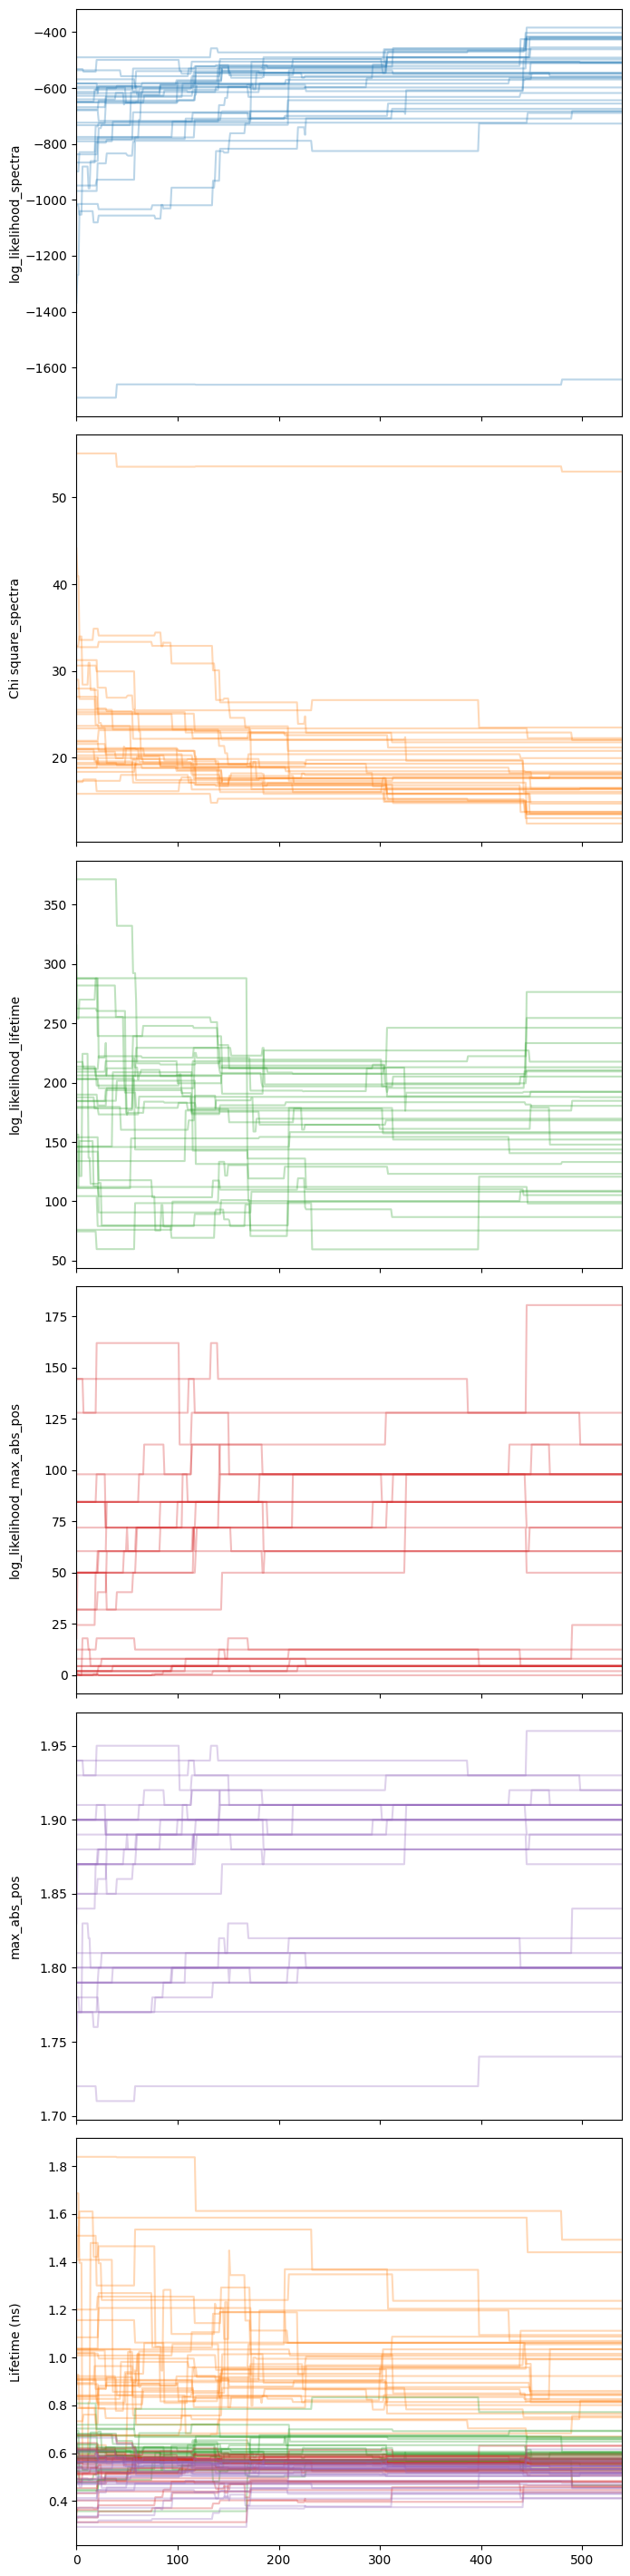

In [ ]:
def plot_blobs_chain(
    reader,
    model_config_save,
    discard=0,
    filter_log_likelihood=None,
    temp_lifetime=[60, 140, 220, 300],
):
    blobs = reader.get_blobs(discard=discard)
    num_blobs = len(blobs.dtype.names)
    fig, axes = plt.subplots(5 + 1, figsize=(7, 1.5 * num_blobs), sharex=True)
    for i in range(num_blobs):
        ax = axes[i]
        ax.plot(blobs[blobs.dtype.names[i]], alpha=0.3, color="C" + str(i))
        ax.set_xlim(0, len(blobs))
        ax.set_ylabel(blobs.dtype.names[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
        if i > 3:
            break
    lifetime_dict = {}
    for temp in temp_lifetime:
        lifetime_dict[temp] = (
            1
            / (blobs[f"Ex_kr_{temp:.1f}K"] + blobs[f"Ex_knr_{temp:.1f}K"])
            * 1e9
        )

    ax = axes[i + 1]
    for i, (temp, lifetime) in enumerate(lifetime_dict.items()):
        ax.plot(lifetime, alpha=0.3, color="C" + str(i + 1))
    ax.set_xlim(0, len(blobs))
    ax.set_ylabel("Lifetime (ns)")
    ax.yaxis.set_label_coords(-0.1, 0.5)
    # ax.set_ylim(0, 2)
    fig.tight_layout()


plot_blobs_chain(reader, model_config_save, discard=100)

In [21]:
err_stats

['Temp_std_err: 5, error_in_max_abs_pos: 0.005, relative_error_lifetime: 0.05, ',
 'Temp_std_err: 10, error_in_max_abs_pos: 0.005, relative_error_lifetime: 0.01, ',
 'Temp_std_err: 10, error_in_max_abs_pos: 0.005, relative_error_lifetime: 0.05, ',
 'Temp_std_err: 10, error_in_max_abs_pos: 0.01, relative_error_lifetime: 0.05, ']

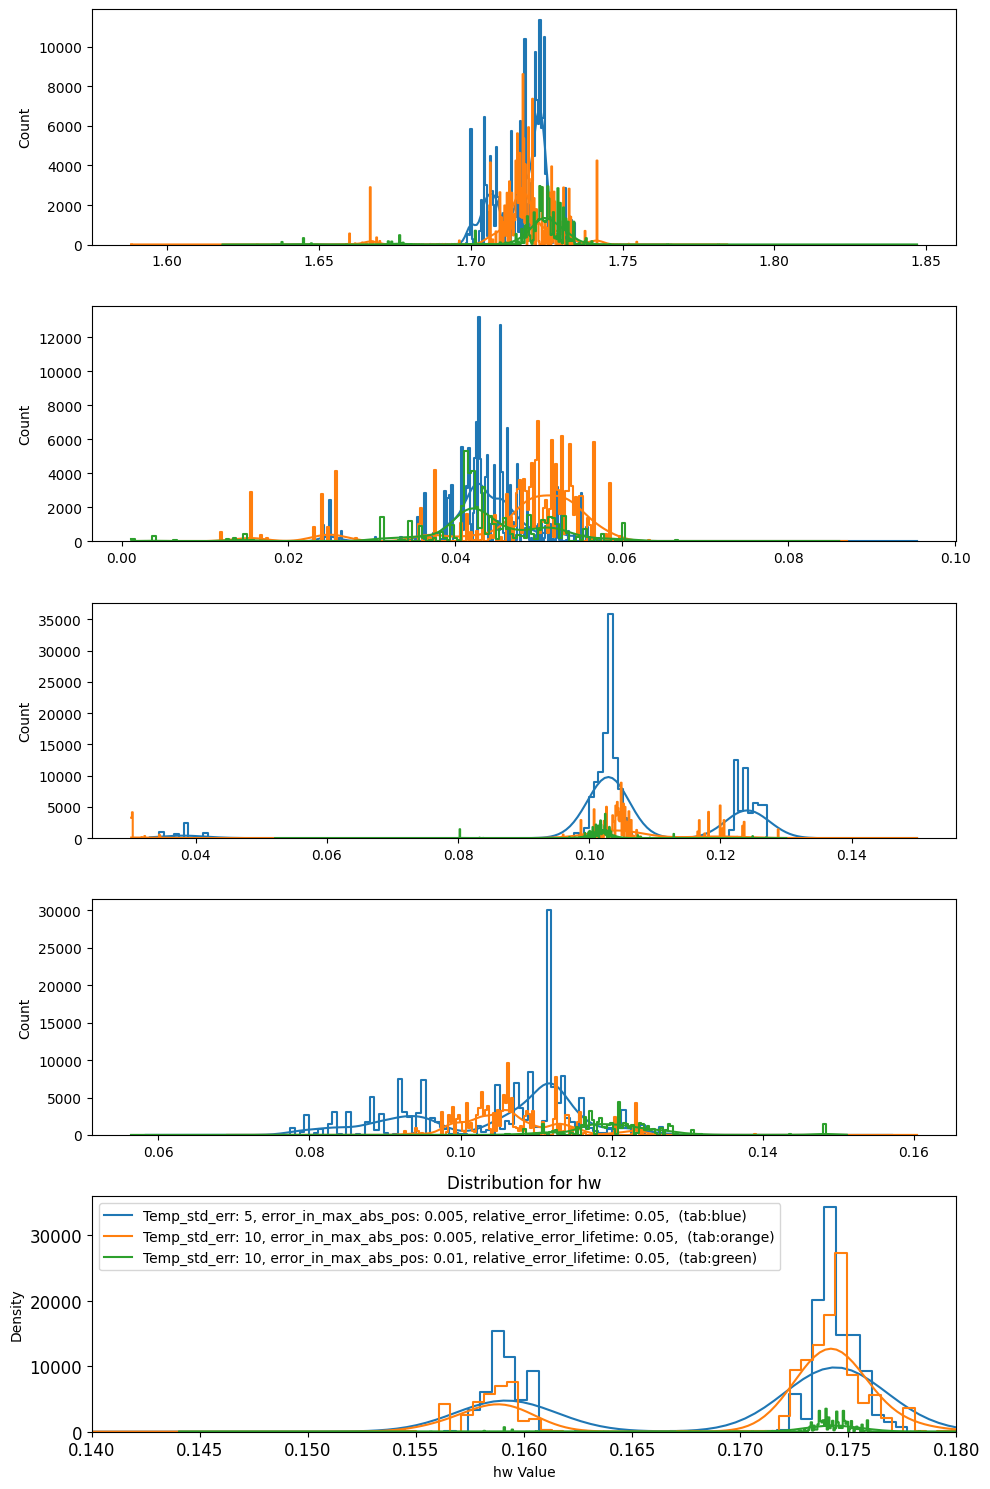

In [ ]:
import seaborn as sns


def plot_overlay_distributions(reader_list):
    # Assuming each index corresponds to a unique configuration but shares parameter labels
    n_params = 5  # Assuming there are 5 parameters
    fig, axes = plt.subplots(n_params, 1, figsize=(10, 15), squeeze=False)

    colors = [
        "tab:blue",
        "tab:orange",
        "tab:green",
        "tab:red",
        "tab:purple",
    ]  # More colors can be added if needed
    labels = [
        "Energy",
        "Sigma",
        "Inner_reorg",
        "Outer_reorg",
        "hw",
    ]  # Placeholder parameter names

    axis_limits = [
        (1.5, 1.8),  # Limits for Energy
        (0, 0.1),  # Limits for Sigma
        (0.03, 0.2),  # LO
        (0.03, 0.2),  # Li
        (0.14, 0.18),  # hw
    ]
    for id, reader in enumerate(reader_list):
        label = err_stats[id]
        # Extract the samples for the ith parameter and discard the initial steps
        samples_all = reader.get_chain(discard=0, flat=True)
        for i in range(n_params):
            samples = samples_all[:, i]

            sns.histplot(
                samples,
                ax=axes[i, 0],
                kde=True,
                color=colors[id % len(colors)],
                label=f"{label} ({colors[id % len(colors)]})",
                element="step",
                fill=False,
                kde_kws={"bw_adjust": 2},
            )

        axes[i, 0].set_title(f"Distribution for {labels[i]}")
        axes[i, 0].set_ylabel("Density", fontsize=10)
        axes[i, 0].set_xlabel(f"{labels[i]} Value")
        axes[i, 0].set_xlim(axis_limits[i])
        axes[i, 0].legend()
        axes[i, 0].tick_params(
            axis="both", which="major", labelsize=12
        )  # Increase tick label size

    plt.tight_layout()
    plt.show()


# Example usage:
plot_overlay_distributions(reader_list)
